#데이터 및 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/KOVIX.csv', encoding = 'cp949')
data = data[['일자', '종가', '등락률']]
data.columns = ['Date', 'KOVIX', 'Rate']

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = [x.year for x in data['Date']]
data['Month'] = [x.month for x in data['Date']]
data['Day'] = [x.weekday() for x in data['Date']]
data

,Date,KOVIX,Rate,Year,Month,Day
0,2023-01-25,16.84,0.18,2023,1,2
1,2023-01-20,16.81,-0.47,2023,1,4
2,2023-01-19,16.89,0.54,2023,1,3
3,2023-01-18,16.80,-0.30,2023,1,2
4,2023-01-17,16.85,-0.18,2023,1,1
...,...,...,...,...,...,...
4958,2003-01-08,33.17,-2.38,2003,1,2
4959,2003-01-07,33.98,2.85,2003,1,1
4960,2003-01-06,33.04,-4.23,2003,1,0
4961,2003-01-03,34.50,-3.01,2003,1,4


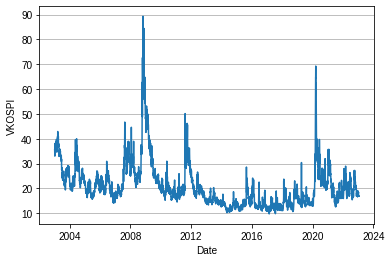

In [ ]:
plt.plot(data['Date'], data['KOVIX'])
plt.xlabel('Date')
plt.ylabel('VKOSPI')
plt.style.use('seaborn')
plt.grid(visible=True, axis = 'y')
plt.show()

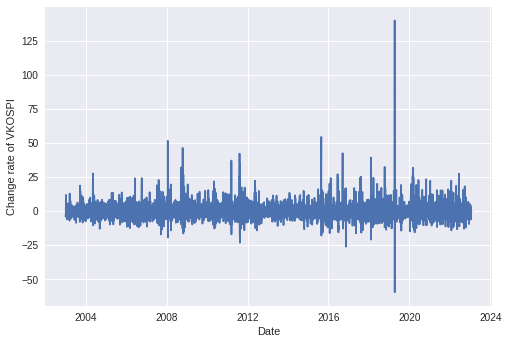

In [ ]:
plt.plot(data['Date'], data['Rate'])
plt.xlabel('Date')
plt.ylabel('Change rate of VKOSPI')
plt.style.use('seaborn')
plt.grid(visible=True, axis = 'y')
plt.show()

# 요일별 KOVIX 비교

In [ ]:
data2 = pd.DataFrame(data.groupby('Day')['Rate'].mean()).reset_index()
data2

,Day,Rate
0,0,2.336053
1,1,-0.606703
2,2,0.050749
3,3,-0.485295
4,4,-0.499929


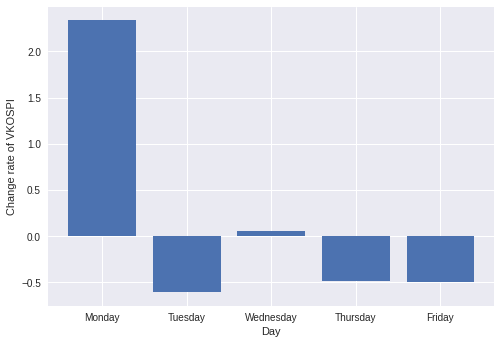

In [ ]:
plt.bar(data2['Day'], data2['Rate'])
plt.xlabel('Day')
plt.xticks([0,1,2,3,4], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.ylabel('Change rate of VKOSPI')
plt.style.use('seaborn')
plt.grid(visible=True, axis = 'y')
plt.show()

#가설검정 

In [ ]:
monday = data[data['Day'] == 0]
monday

,Date,KOVIX,Rate,Year,Month,Day
5,2023-01-16,16.88,-1.80,2023,1,0
10,2023-01-09,18.48,4.17,2023,1,0
15,2023-01-02,18.85,2.45,2023,1,0
19,2022-12-26,17.46,0.17,2022,12,0
24,2022-12-19,17.60,3.35,2022,12,0
...,...,...,...,...,...,...
4941,2003-02-03,35.82,-0.17,2003,2,0
4945,2003-01-27,38.46,5.08,2003,1,0
4950,2003-01-20,35.97,-0.08,2003,1,0
4955,2003-01-13,37.56,-1.29,2003,1,0


In [ ]:
monday_not = data[data['Day'] != 0]
monday_not

,Date,KOVIX,Rate,Year,Month,Day
0,2023-01-25,16.84,0.18,2023,1,2
1,2023-01-20,16.81,-0.47,2023,1,4
2,2023-01-19,16.89,0.54,2023,1,3
3,2023-01-18,16.80,-0.30,2023,1,2
4,2023-01-17,16.85,-0.18,2023,1,1
...,...,...,...,...,...,...
4957,2003-01-09,34.02,2.56,2003,1,3
4958,2003-01-08,33.17,-2.38,2003,1,2
4959,2003-01-07,33.98,2.85,2003,1,1
4961,2003-01-03,34.50,-3.01,2003,1,4


In [ ]:
moday_mean = monday['Rate'].mean()
moday_not_mean = monday_not['Rate'].mean()
print(moday_mean)
print(moday_not_mean)

2.3360528992878944
-0.3863810002513194


In [ ]:
moday_std = monday['Rate'].std()
moday_not_std = monday_not['Rate'].std()
print(moday_std)
print(moday_not_std)

5.9402089498494
5.924355365551281


In [ ]:
moday_number = len(monday['Rate'])
moday_not_number = len(monday_not['Rate'])
print(moday_number)
print(moday_not_number)

983
3980


In [ ]:
mean = moday_mean - moday_not_mean
std = np.sqrt((moday_std**2)/moday_number + (moday_not_std**2)/moday_not_number)
print(mean)
print(std)

2.722433899539214
0.21145900164510203


In [ ]:
t = mean/std
t

12.87452356418648

In [ ]:
from scipy.stats import norm

In [ ]:
p = 1 - norm.cdf(t)
p

0.0